<a href="https://colab.research.google.com/github/samirkarki/unicode-classification/blob/main/Unicode_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses CNN to classify handwritten digits as क-ज्ञ and ०-९

In [8]:
#import the library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import mnist, _sys
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
import glob


In [33]:
BATCH_SIZE = 100
IMG_SHAPE = 32
EPOCHS = 50


In [ ]:
#load data and split into train and test sets
# for devnagari use this dataset 
# https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
base_dir = '/content/DevanagariHandwrittenCharacterDataset'
#!unzip '/content/drive/MyDrive/DevanagariHandwrittenCharacterDataset.zip'

In [16]:

train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'Test')

print(train_dir)

train_labels_num = len(os.listdir(train_dir))
test_labels_num = len(os.listdir(test_dir))

print(train_labels_num)
print(test_labels_num)


/content/DevanagariHandwrittenCharacterDataset/Train
46
46


In [22]:
class_folders = sorted(glob.glob(train_dir+'/*'))
print(class_folders)
classes = []
for i in class_folders:
  classes.append(i.split("_")[-1])
classes

['/content/DevanagariHandwrittenCharacterDataset/Train/character_10_yna', '/content/DevanagariHandwrittenCharacterDataset/Train/character_11_taamatar', '/content/DevanagariHandwrittenCharacterDataset/Train/character_12_thaa', '/content/DevanagariHandwrittenCharacterDataset/Train/character_13_daa', '/content/DevanagariHandwrittenCharacterDataset/Train/character_14_dhaa', '/content/DevanagariHandwrittenCharacterDataset/Train/character_15_adna', '/content/DevanagariHandwrittenCharacterDataset/Train/character_16_tabala', '/content/DevanagariHandwrittenCharacterDataset/Train/character_17_tha', '/content/DevanagariHandwrittenCharacterDataset/Train/character_18_da', '/content/DevanagariHandwrittenCharacterDataset/Train/character_19_dha', '/content/DevanagariHandwrittenCharacterDataset/Train/character_1_ka', '/content/DevanagariHandwrittenCharacterDataset/Train/character_20_na', '/content/DevanagariHandwrittenCharacterDataset/Train/character_21_pa', '/content/DevanagariHandwrittenCharacterData

['yna',
 'taamatar',
 'thaa',
 'daa',
 'dhaa',
 'adna',
 'tabala',
 'tha',
 'da',
 'dha',
 'ka',
 'na',
 'pa',
 'pha',
 'ba',
 'bha',
 'ma',
 'yaw',
 'ra',
 'la',
 'waw',
 'kha',
 'motosaw',
 'petchiryakha',
 'patalosaw',
 'ha',
 'chhya',
 'tra',
 'gya',
 'ga',
 'gha',
 'kna',
 'cha',
 'chha',
 'ja',
 'jha',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [23]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        print(img.shape)
    plt.tight_layout()
    plt.show()

In [24]:
#Image augmentation
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 78200 images belonging to 46 classes.


(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


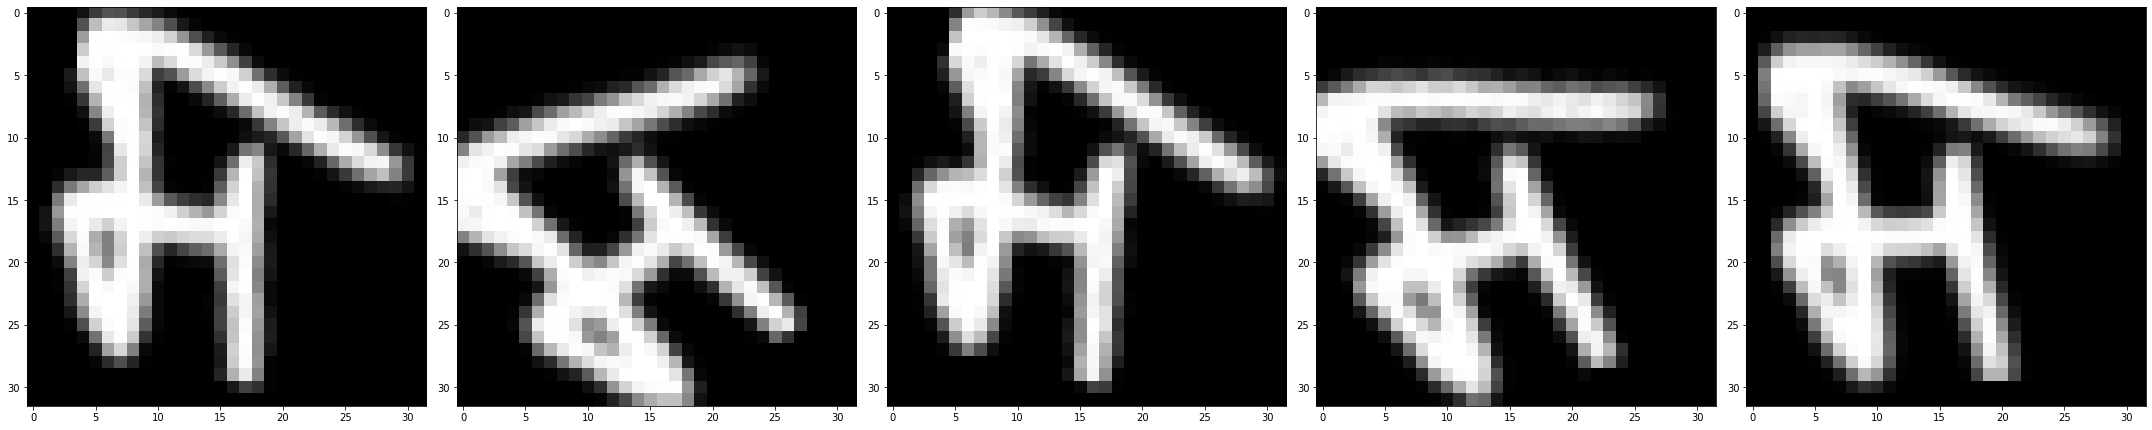

In [25]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [26]:
#Image augmentation
image_gen_test = ImageDataGenerator(rescale=1./255)

validation_data_gen = image_gen_test.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=test_dir,
                                               shuffle=False,
                                               target_size=(IMG_SHAPE,IMG_SHAPE),
                                               class_mode='categorical')

Found 13800 images belonging to 46 classes.


(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


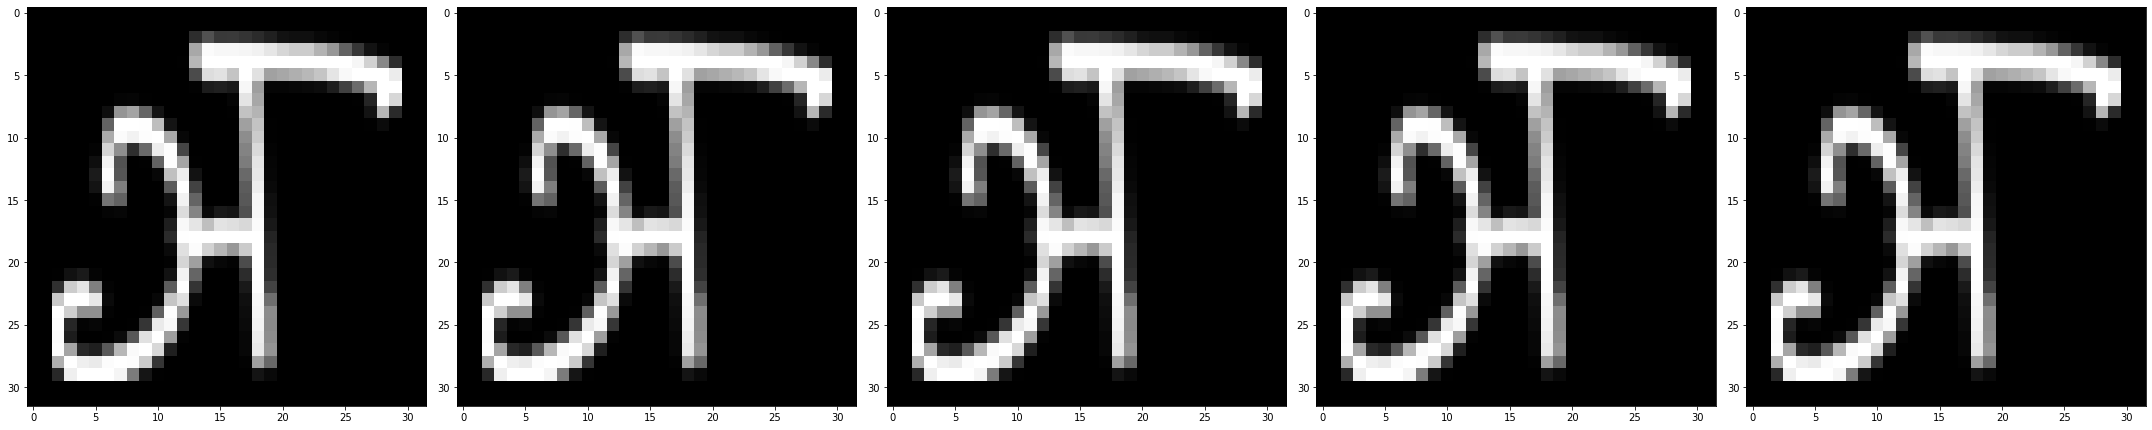

In [28]:
augmented_images = [validation_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
# reshape the data to fit the model
#X_train = X_train.reshape(60000, 28, 28, 1)
#X_test = X_test.reshape(10000, 28, 28, 1)
train_data_gen.classes

array([ 0,  0,  0, ..., 45, 45, 45], dtype=int32)

In [ ]:
# one-hot encoding: 
#y_train_one_hot = to_categorical(y_train)
#y_test_one_hot = to_categorical(y_test)

#print the new label
#print(y_train_one_hot)


In [29]:
#build the cnn model
model = Sequential()
#add model layers
model.add(Conv2D(64,kernel_size=3, activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(train_labels_num, activation='softmax'))

In [30]:
# compile the model
#opt = Adam(learning_rate=0.01)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
#train the model
hist=model.fit(
    train_data_gen,
    steps_per_epoch = train_data_gen.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_steps = validation_data_gen.samples // BATCH_SIZE,
    validation_data=validation_data_gen)

Epoch 1/50
782/782 [==============================] - 67s 72ms/step - loss: 0.9796 - accuracy: 0.7316 - val_loss: 0.3777 - val_accuracy: 0.8892
Epoch 2/50
782/782 [==============================] - 55s 70ms/step - loss: 0.3929 - accuracy: 0.8883 - val_loss: 0.2688 - val_accuracy: 0.9193
Epoch 3/50
782/782 [==============================] - 55s 70ms/step - loss: 0.2823 - accuracy: 0.9191 - val_loss: 0.2112 - val_accuracy: 0.9405
Epoch 4/50
782/782 [==============================] - 55s 70ms/step - loss: 0.2256 - accuracy: 0.9347 - val_loss: 0.1828 - val_accuracy: 0.9479
Epoch 5/50
782/782 [==============================] - 56s 71ms/step - loss: 0.1904 - accuracy: 0.9437 - val_loss: 0.1584 - val_accuracy: 0.9528
Epoch 6/50
782/782 [==============================] - 56s 72ms/step - loss: 0.1677 - accuracy: 0.9503 - val_loss: 0.1506 - val_accuracy: 0.9535
Epoch 7/50
782/782 [==============================] - 57s 73ms/step - loss: 0.1520 - accuracy: 0.9540 - val_loss: 0.1400 - val_accuracy:

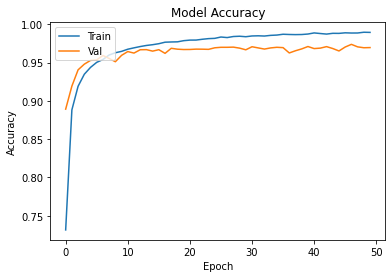

In [34]:
#visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc ='upper left')
plt.show()

In [35]:
#show predictions as probabilities for the first 4 images in the test set
eval_img, eval_label = next(validation_data_gen)
predictions = model.predict(eval_img);

In [38]:
#Print our predictions as number labels
predicted_label = np.argmax(predictions, axis=1)
actual_label = np.argmax(eval_label, axis=1) 
#print the actual labels
print(predicted_label)
print(actual_label)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0
  0  0  0  0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [36]:
print(classes)

['yna', 'taamatar', 'thaa', 'daa', 'dhaa', 'adna', 'tabala', 'tha', 'da', 'dha', 'ka', 'na', 'pa', 'pha', 'ba', 'bha', 'ma', 'yaw', 'ra', 'la', 'waw', 'kha', 'motosaw', 'petchiryakha', 'patalosaw', 'ha', 'chhya', 'tra', 'gya', 'ga', 'gha', 'kna', 'cha', 'chha', 'ja', 'jha', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


predicted class:  yna
actual class:  yna


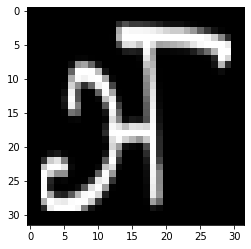

predicted class:  yna
actual class:  yna


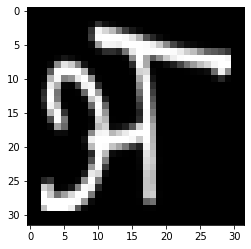

predicted class:  yna
actual class:  yna


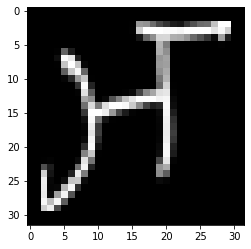

predicted class:  yna
actual class:  yna


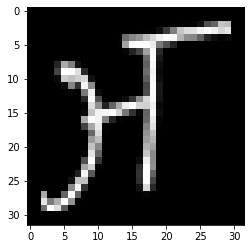

predicted class:  yna
actual class:  yna


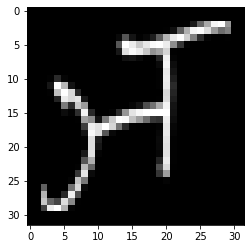

predicted class:  yna
actual class:  yna


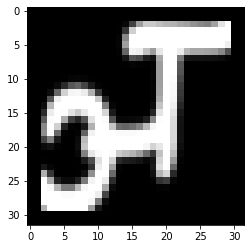

predicted class:  yna
actual class:  yna


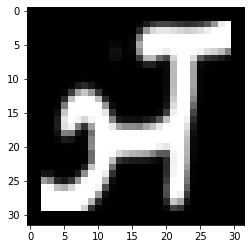

predicted class:  yna
actual class:  yna


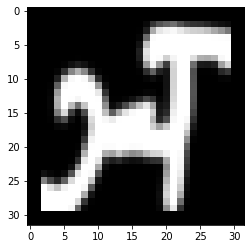

predicted class:  yna
actual class:  yna


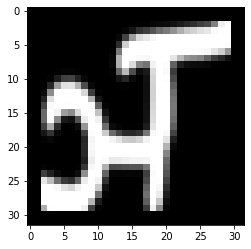

predicted class:  yna
actual class:  yna


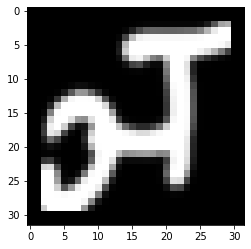

In [40]:
#show first 10 images
i = 0
for img in eval_img[0:10]:
  image =np.array(img, dtype='float')
  #pixels = image.reshape(28,28)
  plt.imshow(image)
  print('predicted class: ', classes[predicted_label[i]])
  print('actual class: ',classes[actual_label[i]])
  i +=1
  plt.show()